# Airbnb en Nueva York

Una empresa ha recolectado la información del alquiler de viviendas en Nueva York a través de la aplicación Airbnb durante el año 2019. Este conjunto de datos se utilizó para entrenar modelos de Machine Learning durante ese año, en una competición en abierto.

Ahora lo utilizaremos para llevar a cabo un estudio acerca de las variables que componen el dataset a fin de comprenderlo y obtener conclusiones sobre él.

### Paso 1: Carga del conjunto de datos
Puedes descargar el conjunto de datos directamente desde Kaggle.com o en el siguiente enlace: https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv. Almacena los datos en crudo en la carpeta ./data/raw.


Opcional, para descargar el archivo.csv desde la terminal: wget https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv.

Opcional, para mover a la carpeta src desde la terminal: mv AB_NYC_2019.csv ./data/raw/


In [159]:
import pandas as pd

df = pd.read_csv("/workspaces/machine-learning-python-template-pilarzarco/data/AB_NYC_2019.csv")
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


### Paso 2: Realiza un EDA completo
Este paso es vital para asegurar que nos quedamos con las variables estrictamente necesarias y eliminamos las que no son relevantes o no aportan información. Utiliza el Notebook de ejemplo que trabajamos y adáptalo a este caso de uso.

Asegúrate de dividir convenientemente el conjunto de datos en train y test como hemos visto en la lección.

In [160]:
# Dimensiones del Data Frame
df.shape

(48895, 16)

In [161]:
# Información sobre el tipo de datos de las columnas, la cantidad de valores no nulos y el uso de memoria
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [162]:
df_drop = df.drop(["host_name", "name", "last_review", "neighbourhood", "host_id"], axis=1, inplace=False)
df_drop.head()

,id,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Brooklyn,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2595,Manhattan,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,3647,Manhattan,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,3831,Brooklyn,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,5022,Manhattan,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [163]:
# Columnas que deseas eliminar
columns_to_drop = ["host_name", "name", "last_review", "neighbourhood", "host_id"]

# DataFrame sin las columnas especificadas
df = df.drop(columns_to_drop, axis=1)

df.head()


,id,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Brooklyn,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2595,Manhattan,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,3647,Manhattan,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,3831,Brooklyn,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,5022,Manhattan,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


#### - Análisis de variables univariante

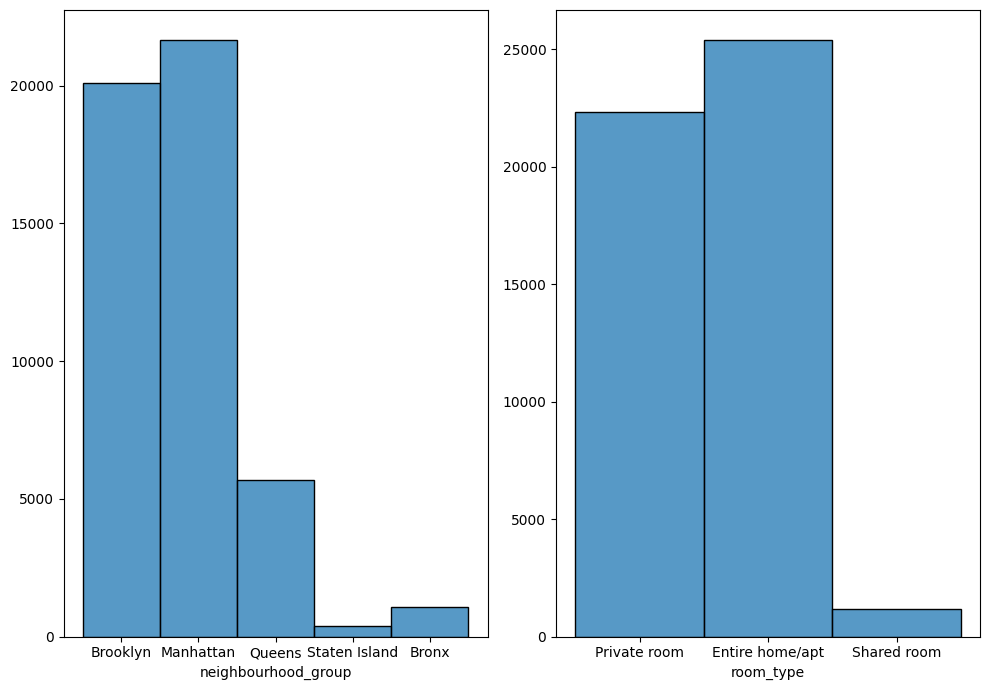

In [164]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un histograma múltiple sobre variables categóricas
fig, axis = plt.subplots(1, 2, figsize=(10, 7))

sns.histplot(ax=axis[0], data=df, x="neighbourhood_group").set(ylabel=None)
sns.histplot(ax=axis[1], data=df, x="room_type").set(ylabel=None)

plt.tight_layout()
plt.show()

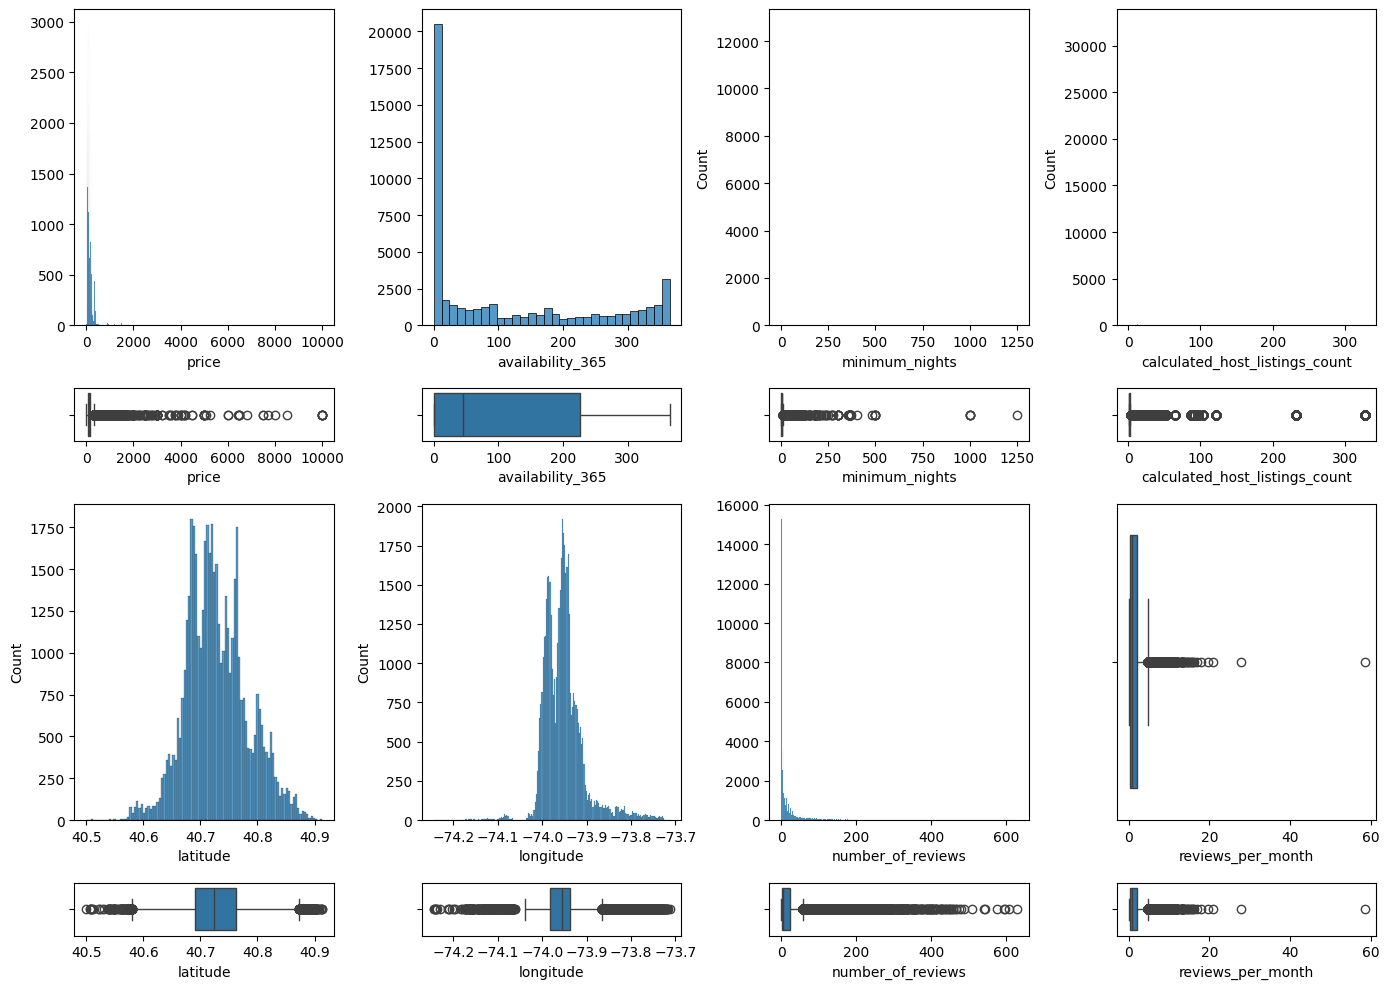

In [165]:
# Crear una figura múltiple con histogramas y diagramas de caja sobre variables numéricas
fig, axis = plt.subplots(4, 4, figsize = (14, 10), gridspec_kw={'height_ratios': [6, 1, 6, 1]})

sns.histplot(ax=axis[0, 0], data=df, x="price").set(ylabel=None)
sns.boxplot(ax=axis[1, 0], data=df, x="price")

sns.histplot(ax=axis[0, 1], data=df, x="availability_365").set(ylabel=None)
sns.boxplot(ax=axis[1, 1], data=df, x="availability_365")

sns.histplot(ax=axis[0, 2], data=df, x="minimum_nights")
sns.boxplot(ax=axis[1, 2], data=df, x="minimum_nights")

sns.histplot(ax=axis[0, 3], data=df, x="calculated_host_listings_count")
sns.boxplot(ax=axis[1, 3], data=df, x="calculated_host_listings_count")

sns.histplot(ax=axis[2, 0], data=df, x="latitude")
sns.boxplot(ax=axis[3, 0], data=df, x="latitude")

sns.histplot(ax=axis[2, 1], data=df, x="longitude")
sns.boxplot(ax=axis[3, 1], data=df, x="longitude")

sns.histplot(ax=axis[2, 2], data=df, x="number_of_reviews").set(ylabel=None)
sns.boxplot(ax=axis[3, 2], data=df, x="number_of_reviews")

sns.boxplot(ax=axis[2, 3], data=df, x="reviews_per_month").set(ylabel=None)
sns.boxplot(ax=axis[3, 3], data=df, x="reviews_per_month")



plt.tight_layout()
plt.show()

In [166]:
df['room_type_n'] = pd.factorize(df['room_type'])[0]
df['neighbourhood_group_n'] = pd.factorize(df['neighbourhood_group'])[0]

<Axes: >

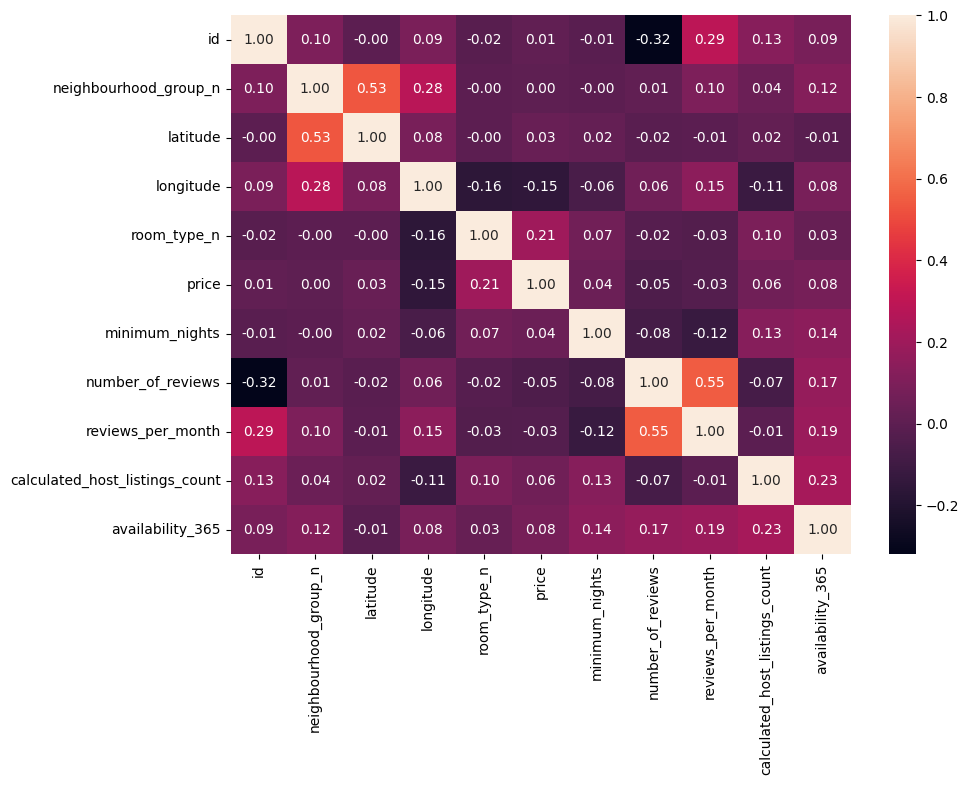

In [167]:
fig, axis = plt.subplots(figsize = (10, 7))
sns.heatmap(df[["id", "neighbourhood_group_n", "latitude", "longitude", "room_type_n", "price", "minimum_nights", "number_of_reviews", "reviews_per_month", "calculated_host_listings_count", "availability_365"]].corr(), annot = True, fmt = ".2f")

#### - Análisis de variables multivariante

In [168]:
# Comenzamos con el análisis numérico-numérico


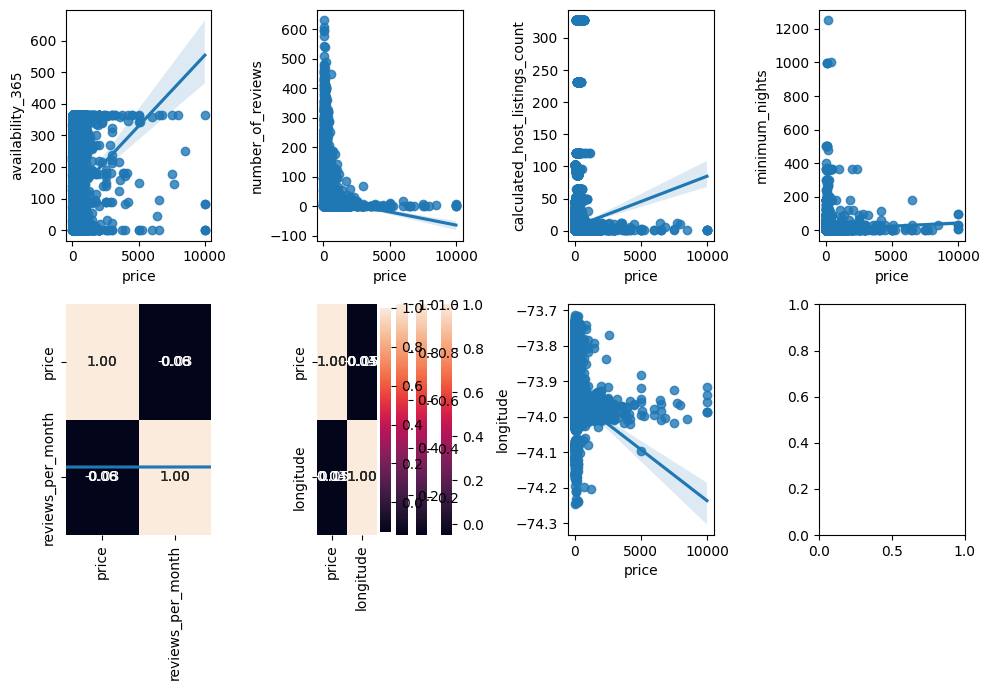

In [169]:
fig, axis = plt.subplots(2, 4, figsize = (10, 7))

# Crear un diagrama de dispersión múltiple
sns.regplot(ax = axis[0, 0], data = df, x = "price", y = "availability_365")
sns.heatmap(df[["price", "availability_365"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)

sns.regplot(ax = axis[0, 1], data = df, x = "price", y = "number_of_reviews")
sns.heatmap(df[["price", "number_of_reviews"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])

sns.regplot(ax = axis[0, 2], data = df, x = "price", y = "calculated_host_listings_count")
sns.heatmap(df[["price", "calculated_host_listings_count"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)

sns.regplot(ax = axis[0, 3], data = df, x = "price", y = "minimum_nights")
sns.heatmap(df[["price", "minimum_nights"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])

sns.regplot(ax = axis[1, 0], data = df, x = "price", y = "reviews_per_month")
sns.heatmap(df[["price", "reviews_per_month"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)

sns.regplot(ax = axis[1, 1], data = df, x = "price", y = "latitude")
sns.heatmap(df[["price", "latitude"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])

sns.regplot(ax = axis[1, 2], data = df, x = "price", y = "longitude")
sns.heatmap(df[["price", "longitude"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])

plt.tight_layout()
plt.show()

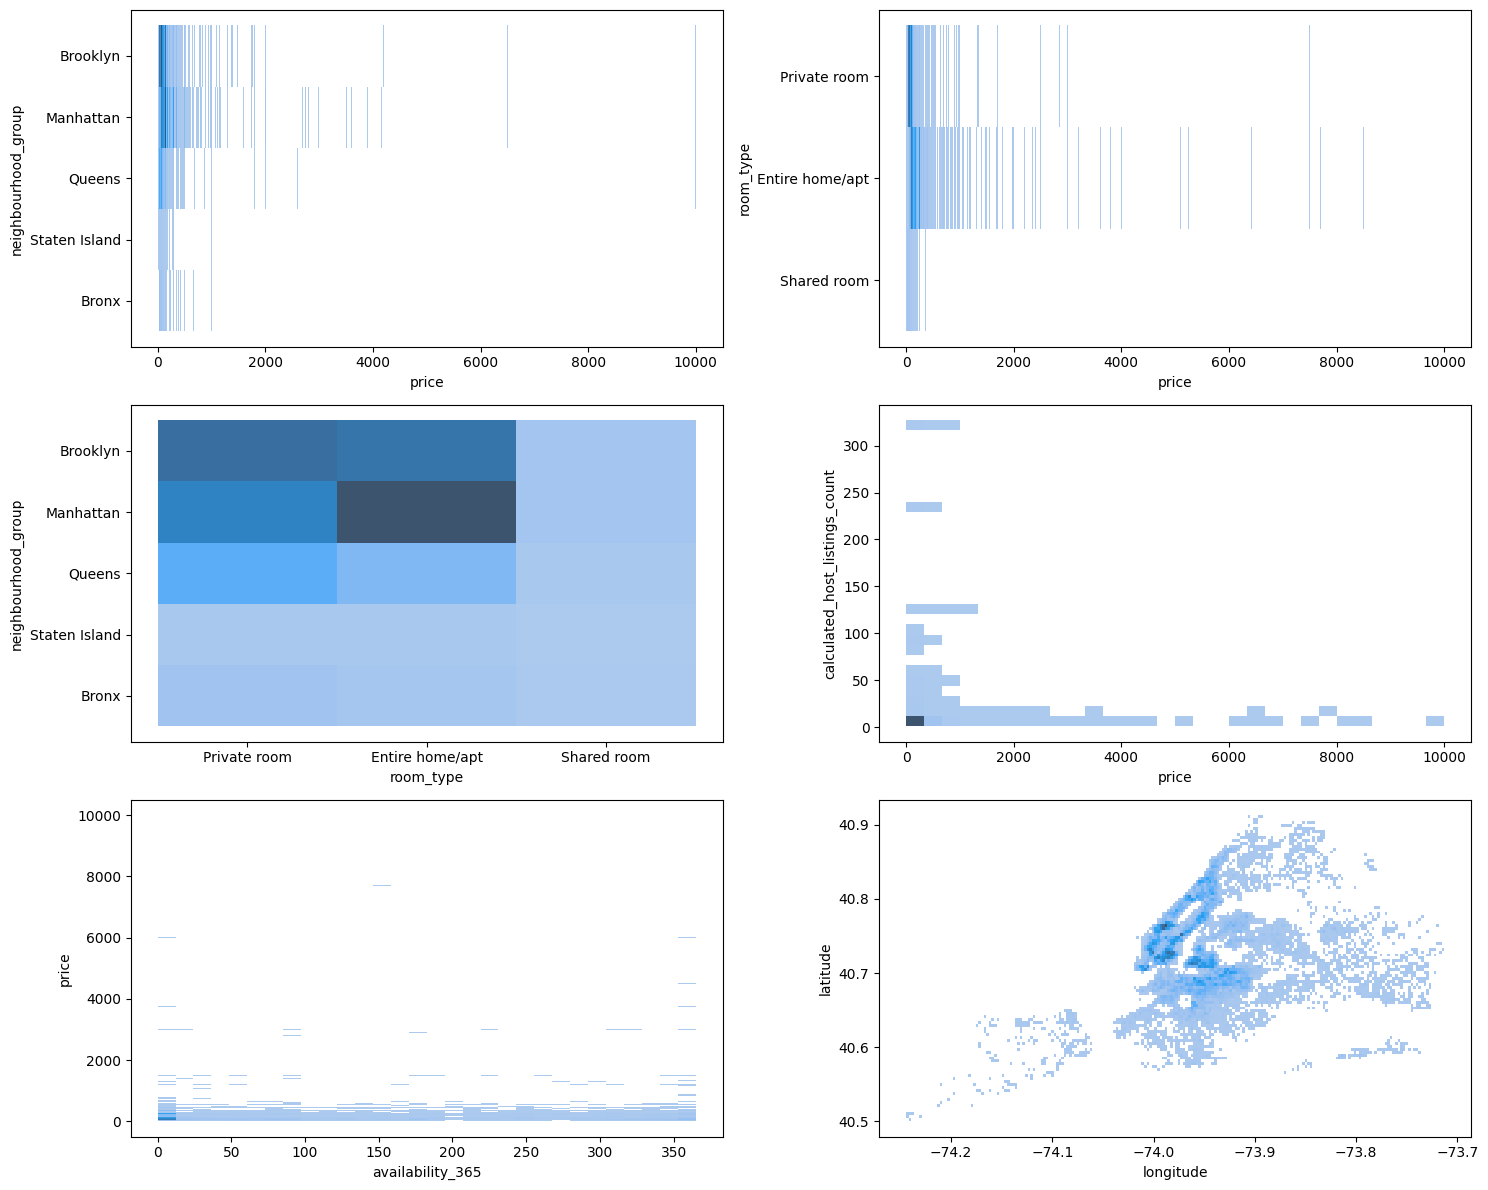

In [170]:

fig, axis = plt.subplots(3, 2, figsize= (15, 12))

sns.histplot(data = df, x = 'price', y = 'neighbourhood_group', ax= axis[0, 0]) # Precio por barrios 
sns.histplot(data = df, x = 'price', y = 'room_type', ax= axis[0, 1]) # Distribución de Precio por tipo de habitacion
sns.histplot(data = df, x = 'room_type', y = 'neighbourhood_group', ax= axis[1, 0]) # Distribución de Tipo de Habitación por Barrio
sns.histplot(data = df, x = 'price', y = 'calculated_host_listings_count', ax= axis[1, 1], bins=30) # Impacto del Número de Listados del Anfitrión
sns.histplot(data=df, x='availability_365', y='price', ax=axis[2, 0]) # Relación precio con la Disponibilidad Anual, lo podemos vsualizar tambien con .scatterplot
sns.histplot(data=df, x='longitude', y='latitude', ax=axis[2, 1])  # Dispersión Geográfica, lo podemos vsualizar tambien con .scatterplot

plt.tight_layout()
plt.show()

In [171]:
# Análisis categórico-categórico

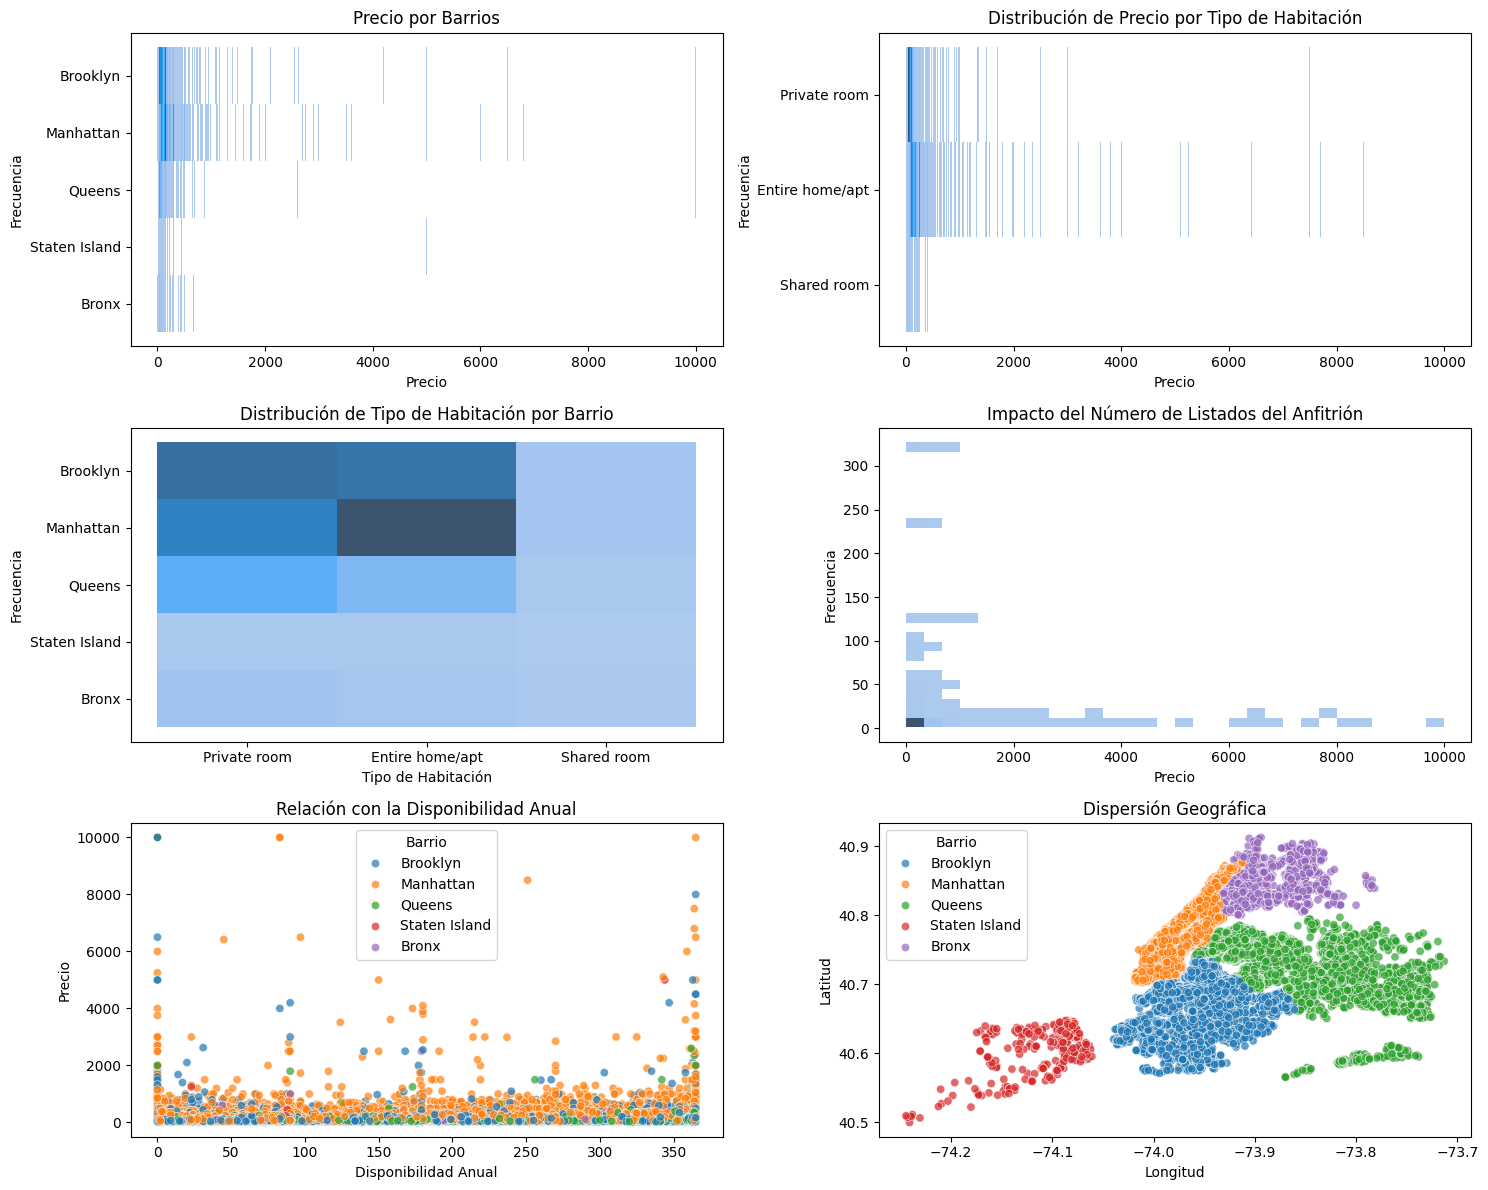

In [172]:
import matplotlib.pyplot as plt 
import seaborn as sns

fig, axis = plt.subplots(3, 2, figsize=(15, 12))

# Precio por barrios
sns.histplot(data=df, x='price', y='neighbourhood_group', ax=axis[0, 0])
axis[0, 0].set_title('Precio por Barrios')
axis[0, 0].set_xlabel('Precio')
axis[0, 0].set_ylabel('Frecuencia')

# Distribución de Precio por tipo de habitación
sns.histplot(data=df, x='price', y='room_type', ax=axis[0, 1])
axis[0, 1].set_title('Distribución de Precio por Tipo de Habitación')
axis[0, 1].set_xlabel('Precio')
axis[0, 1].set_ylabel('Frecuencia')

# Distribución de Tipo de Habitación por Barrio
sns.histplot(data=df, x='room_type', y='neighbourhood_group', ax=axis[1, 0])
axis[1, 0].set_title('Distribución de Tipo de Habitación por Barrio')
axis[1, 0].set_xlabel('Tipo de Habitación')
axis[1, 0].set_ylabel('Frecuencia')

# Impacto del Número de Listados del Anfitrión
sns.histplot(data=df, x='price', y='calculated_host_listings_count', ax=axis[1, 1], bins=30)
axis[1, 1].set_title('Impacto del Número de Listados del Anfitrión')
axis[1, 1].set_xlabel('Precio')
axis[1, 1].set_ylabel('Frecuencia')

# Relación con la Disponibilidad Anual
sns.scatterplot(data=df, x='availability_365', y='price', hue='neighbourhood_group', ax=axis[2, 0], alpha=0.7)
axis[2, 0].set_title('Relación con la Disponibilidad Anual')
axis[2, 0].set_xlabel('Disponibilidad Anual')
axis[2, 0].set_ylabel('Precio')
axis[2, 0].legend(title='Barrio')

# Dispersión Geográfica
sns.scatterplot(data=df, x='longitude', y='latitude', hue='neighbourhood_group', ax=axis[2, 1], alpha=0.7)
axis[2, 1].set_title('Dispersión Geográfica')
axis[2, 1].set_xlabel('Longitud')
axis[2, 1].set_ylabel('Latitud')
axis[2, 1].legend(title='Barrio')

plt.tight_layout()
plt.show()


#### Análisis de outliers

In [173]:
df.describe()

,id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,room_type_n,neighbourhood_group_n
count,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,1.901714e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327,0.567113,0.786911
std,1.098311e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289,0.541249,0.844386
min,2.539000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000,0.000000
25%,9.471945e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000,0.000000,0.000000
50%,1.967728e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000,1.000000,1.000000
75%,2.915218e+07,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000,1.000000,1.000000
max,3.648724e+07,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000,2.000000,4.000000


In [194]:
# Eliminar valores con cero en alguna columna
df = df[df['price'] != 0]
df.describe()

,id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,room_type_n,neighbourhood_group_n
count,4.887300e+04,48873.000000,48873.000000,48873.000000,48873.000000,48873.000000,38827.000000,48873.000000,48873.000000,48873.000000,48873.000000
mean,1.901818e+07,40.728951,-73.952173,152.557977,6.870910,23.275796,1.373287,7.145909,112.745770,0.567082,0.786978
std,1.098398e+07,0.054532,0.046162,236.026502,16.840144,44.555359,1.680464,32.959776,131.606354,0.541159,0.844314
min,2.539000e+03,40.499790,-74.244420,10.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000,0.000000
25%,9.471997e+06,40.690100,-73.983080,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000,0.000000,0.000000
50%,1.967630e+07,40.723080,-73.955690,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000,1.000000,1.000000
75%,2.915317e+07,40.763120,-73.936280,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000,1.000000,1.000000
max,3.648724e+07,40.913060,-73.712990,10000.000000,480.000000,629.000000,58.500000,327.000000,365.000000,2.000000,4.000000


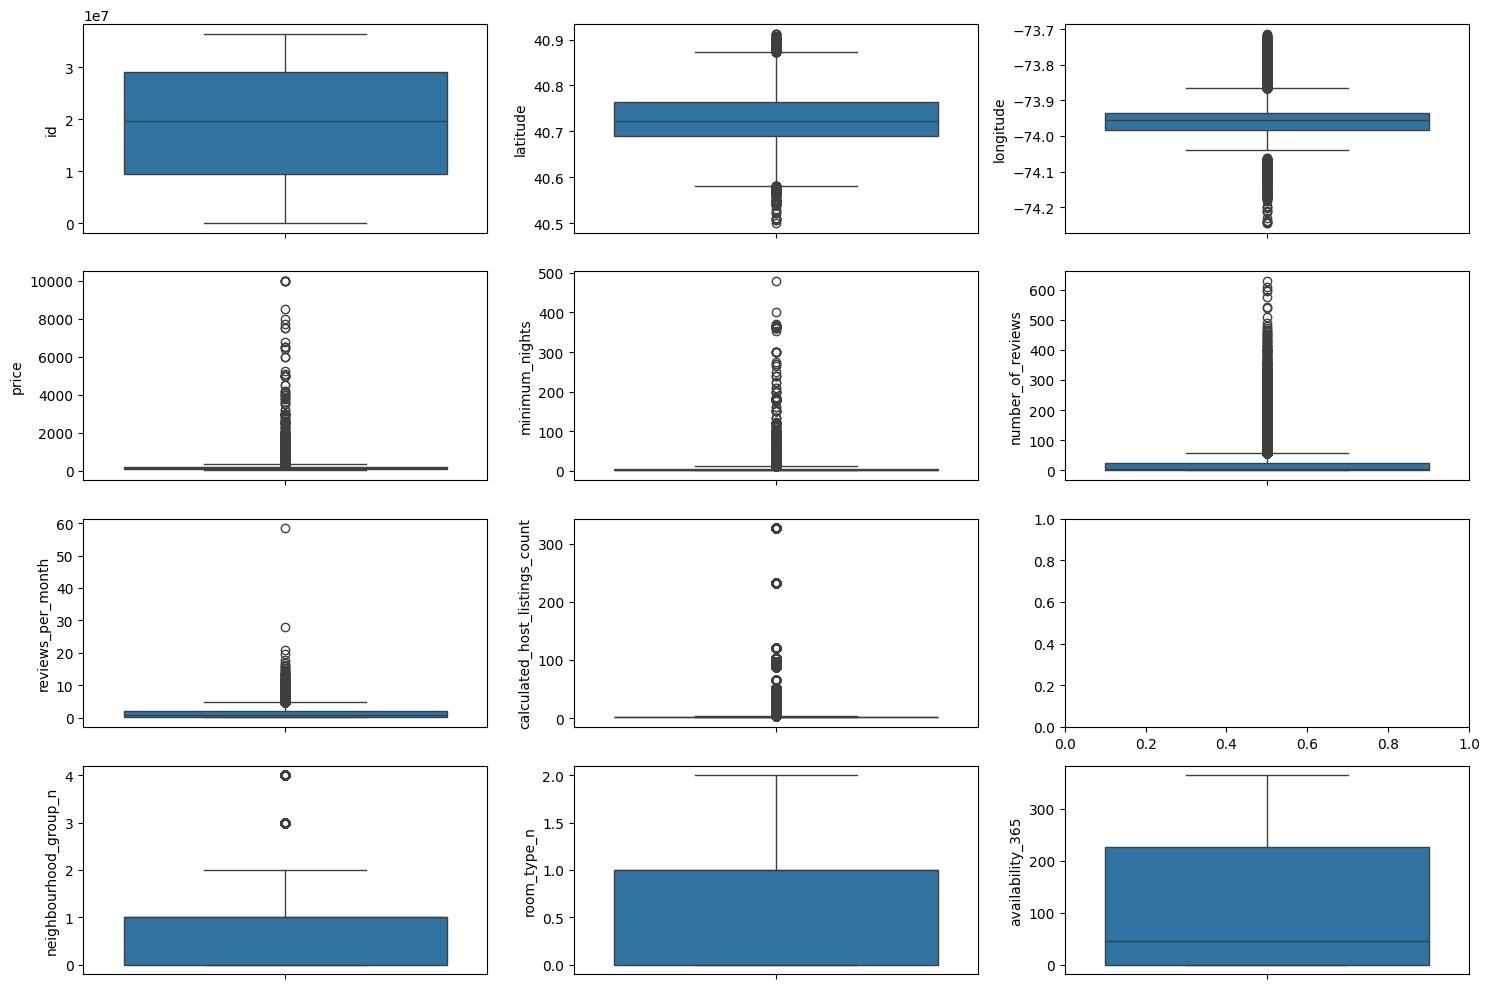

In [195]:
# Diagramas de cajas de las variables
fig, axis = plt.subplots(4, 3, figsize = (15, 10))

sns.boxplot(ax = axis[0, 0], data = df, y = "id")
sns.boxplot(ax = axis[0, 1], data = df, y = "latitude")
sns.boxplot(ax = axis[0, 2], data = df, y = "longitude")
sns.boxplot(ax = axis[1, 0], data = df, y = "price")
sns.boxplot(ax = axis[1, 1], data = df, y = "minimum_nights")
sns.boxplot(ax = axis[1, 2], data = df, y = "number_of_reviews")
sns.boxplot(ax = axis[2, 0], data = df, y = "reviews_per_month")
sns.boxplot(ax = axis[2, 1], data = df, y = "calculated_host_listings_count")

sns.boxplot(ax = axis[3, 0], data = df, y = "neighbourhood_group_n")
sns.boxplot(ax = axis[3, 1], data = df, y = "room_type_n")
sns.boxplot(ax = axis[3, 2], data = df, y = "availability_365")

plt.tight_layout()

plt.show()

#### Análisis de valores faltantes

In [201]:

df_ = df.isnull().sum().sort_values(ascending=False)
df_

reviews_per_month                 10046
id                                    0
neighbourhood_group                   0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
calculated_host_listings_count        0
availability_365                      0
room_type_n                           0
neighbourhood_group_n                 0
dtype: int64

In [202]:
df.isnull().sum().sort_values(ascending=False) / len(df_)

reviews_per_month                 772.769231
id                                  0.000000
neighbourhood_group                 0.000000
latitude                            0.000000
longitude                           0.000000
room_type                           0.000000
price                               0.000000
minimum_nights                      0.000000
number_of_reviews                   0.000000
calculated_host_listings_count      0.000000
availability_365                    0.000000
room_type_n                         0.000000
neighbourhood_group_n               0.000000
dtype: float64

In [205]:
df["price"].fillna(df["price"].median(), inplace = True)
df["minimum_nights"].fillna(df["minimum_nights"].mode()[0], inplace = True)
df["room_type_n"].fillna(df["room_type_n"].mean(), inplace = True)

df.isnull().sum()

id                                    0
neighbourhood_group                   0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10046
calculated_host_listings_count        0
availability_365                      0
room_type_n                           0
neighbourhood_group_n                 0
dtype: int64

### Paso 3: Guarda el conjunto de datos procesado
Después del EDA puedes guardar los datos en la carpeta ./data/processed. Asegúrate de agregar la carpeta de los datos en el .gitignore. Los datos al igual que los modelos no se deben subir a git.